In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from collections import Counter
#import tqdm
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

Welcome to JupyROOT 6.28/00


In [2]:
date = "MAY31"

chainSGN = ROOT.TChain("events")
#chainSGN.Add("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/outputs/{0}/2018/outname_mc1040_GFcat_Phi3Cat_2018.root".format(date))
chainSGN.Add("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/outputs/{0}/2018/outname_mc1039_GFcat_D0StarCat_2018.root".format(date))

df = ROOT.RDataFrame(chainSGN)

df = df.Define("D0GenPT", "getPTParticleMotherGrandMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_pt, 421, 423, 25)[0]")\
    .Define("D0GenPhi", "getPhiEtaParticleMotherGrandMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_phi, GenPart_eta, 421, 423, 25)[0]")\
    .Define("D0GenEta", "getPhiEtaParticleMotherGrandMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_phi, GenPart_eta, 421, 423, 25)[1]")\
    .Define("size", "goodMeson_pt.size()")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


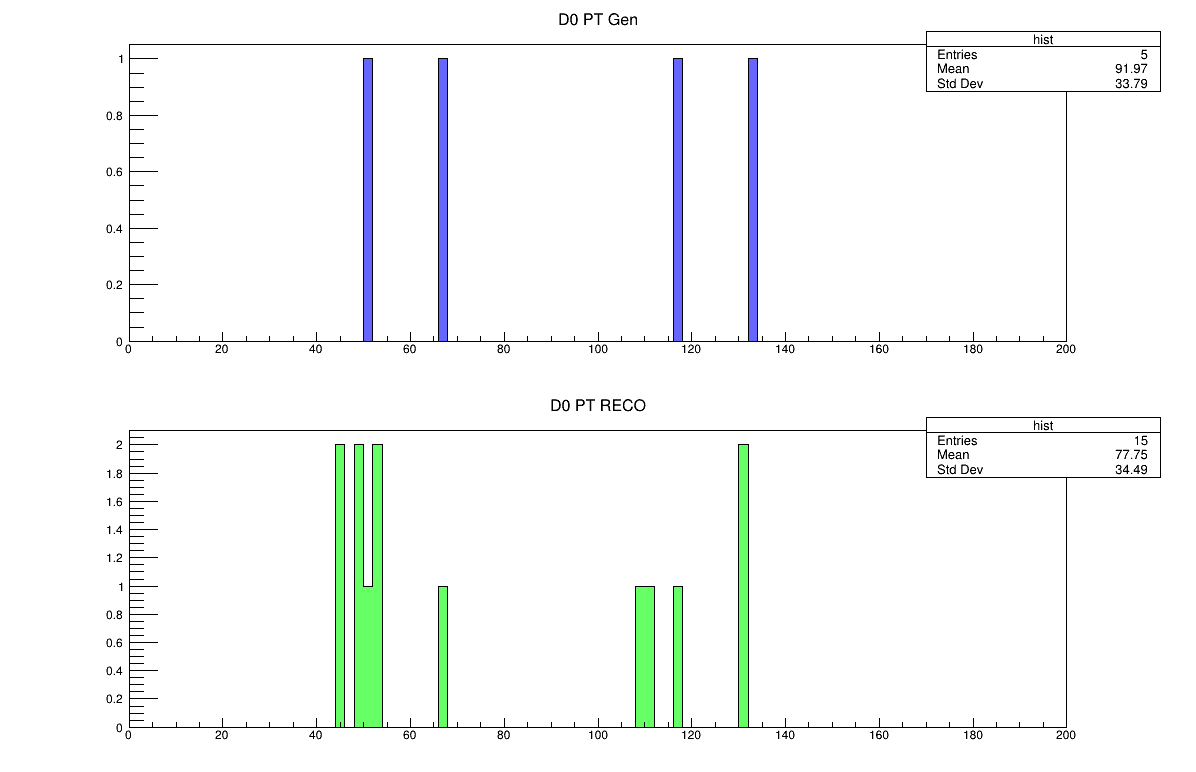

In [127]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 800)

canvas.Divide(1, 2)

bins, xlow, xhigh = 100, 0, 200

hgen=df.Filter("size == 3").Histo1D(("hist", "D0 PT Gen", bins, xlow, xhigh),"D0GenPT")

hreco=df.Filter("size == 3").Histo1D(("hist", "D0 PT RECO", bins, xlow, xhigh),"goodMeson_pt")



hgen.SetFillColor(ROOT.kBlue-7)
hgen.SetLineColor(ROOT.kBlack)
hreco.SetFillColor(ROOT.kGreen-7)
hreco.SetLineColor(ROOT.kBlack)

canvas.cd(1)
hgen.Draw("hist")
canvas.cd(2)
hreco.Draw("hist")

'''
stack = ROOT.THStack("stack", "H cand mass for phi, reconstruction")
stack.Add(hgood.GetValue())
stack.Add(hbad.GetValue())
stack.Draw("hist nostack")
#stack.GetXaxis().SetTitle("p_{T}_{2trk}^{#phi#rightarrow #pi#pi} [GeV]")
stack.GetYaxis().SetTitle("Frequency")

legend = ROOT.TLegend(0.15, 0.65, 0.3, 0.89)
legend.SetMargin(0.17)
legend.SetBorderSize(0)
legend.SetTextSize(0.04)
legend.AddEntry(hbad.GetValue(), "#splitline{{Rejected (mean: {:.1f} GeV)}}{{# entries: {:.0f}}}".format(round(hbad.GetMean(), 1), round(hbad.GetEntries(), 0)), "f")
legend.AddEntry(hgood.GetValue(), "#splitline{{Accepted (mean: {:.1f} GeV)}}{{# entries: {:.0f}}}".format(round(hgood.GetMean(), 1), round(hgood.GetEntries(), 0)), "f")
legend.Draw()
'''


canvas.Draw()


In [123]:
dfnew = df.Filter("size  == 3")

colsDiff = ["goodMeson_pt", "goodMeson_eta", "goodMeson_phi", "goodMeson_iso", "goodMeson_mass",\
    "goodMeson_vtx_chi2dof", "goodMeson_vtx_prob", "goodMeson_sipPV", "goodMeson_bestVtx_X",\
           "goodMeson_bestVtx_Y", "goodMeson_bestVtx_Z", "goodMeson_trk1_pt", "goodMeson_trk2_pt",\
           "goodMeson_leadtrk_pt", "goodMeson_subleadtrk_pt", "goodMeson_threemass"]

cols = ["D0GenPT", "D0GenPhi", "D0GenEta"] + colsDiff

x = dfnew.AsNumpy(columns=cols)

#print(df.AsNumpy(columns=cols)["mc"][0])

pddf = pd.DataFrame(x)

#display(pddf)
#print(set(pddf["mc"]))

In [126]:
colsDiff = ["goodMeson_pt"]
differences = {}
for colname in colsDiff:
    differences[colname] = []

for colname in colsDiff:
    print(colname)
    if colname == "goodMeson_mass" or colname == "goodMeson_threemass":
        tol = 0.02
    elif colname == "goodMeson_trk1_pt" or colname == "goodMeson_trk2_pt":
        tol = 0.5
    else:
        tol = 1.5e-4
    for i in range(len(pddf[colname])):
        v = pddf[colname][i]
        vnp = np.asarray([v[j] for j in range(len(v))])
        mn = np.mean(vnp)
        st = np.std(vnp)
        reldif = abs(st/mn)

        if (reldif > tol):

            print("[{}]".format(i), v, vnp, st, reldif)
        else:
            differences[colname].append(reldif)


goodMeson_pt
[0] { 109.969f, 203.180f, 203.180f } [109.96859741 203.17962646 203.17962646] 43.94010048304318 0.2553034885913429
[1] { 117.616f, 49.0324f, 49.0324f } [117.61589813  49.03239441  49.03239441] 32.330573706778885 0.4497005387529866
[2] { 67.6041f, 52.2312f, 52.2312f } [67.60411072 52.23115158 52.23115158] 7.246882435100104 0.1263503249421985
[3] { 131.437f, 131.437f, 110.459f } [131.43714905 131.43714905 110.45913696] 9.889129734059482 0.07946619942444272
[4] { 44.0447f, 44.0447f, 51.6754f } [44.04473877 44.04473877 51.67538834] 3.597122702291121 0.07721087870900167


In [131]:
colsDiff = ["goodMeson_pt", "goodMeson_iso", "goodMeson_vtx_prob", "goodMeson_trk1_pt", "goodMeson_trk2_pt"]
differences = {}
for colname in colsDiff:
    differences[colname] = []


for i in range(len(pddf[colsDiff[0]]))[:10]:
    for colname in colsDiff:
        #print(colname)

        tol = 1.5e-4

        v = pddf[colname][i]
        vnp = np.asarray([v[j] for j in range(len(v))])
        mn = np.mean(vnp)
        st = np.std(vnp)
        reldif = abs(st/mn)

        print("[{}-{}]".format(i, colname), vnp, round(st, 3), round(reldif, 3))

    print("")


[0-goodMeson_pt] [109.96859741 203.17962646 203.17962646] 43.94 0.255
[0-goodMeson_iso] [0.95255852 1.         1.        ] 0.022 0.023
[0-goodMeson_vtx_prob] [0.1037515  0.66360784 0.66360784] 0.264 0.553
[0-goodMeson_trk1_pt] [ 94.1875 101.875  101.3125] 3.499 0.035
[0-goodMeson_trk2_pt] [ 15.78125 101.3125  101.875  ] 40.453 0.554

[1-goodMeson_pt] [117.61589813  49.03239441  49.03239441] 32.331 0.45
[1-goodMeson_iso] [1. 1. 1.] 0.0 0.0
[1-goodMeson_vtx_prob] [0.08696321 0.88804549 0.88804549] 0.378 0.608
[1-goodMeson_trk1_pt] [36.9375  31.78125 17.28125] 8.321 0.29
[1-goodMeson_trk2_pt] [80.6875  17.28125 31.78125] 27.126 0.627

[2-goodMeson_pt] [67.60411072 52.23115158 52.23115158] 7.247 0.126
[2-goodMeson_iso] [1.         0.96132082 0.96132082] 0.018 0.019
[2-goodMeson_vtx_prob] [0.11055147 0.18290313 0.18290313] 0.034 0.215
[2-goodMeson_trk1_pt] [19.671875 32.03125  20.203125] 5.705 0.238
[2-goodMeson_trk2_pt] [47.9375   20.203125 32.03125 ] 11.363 0.34

[3-goodMeson_pt] [131.437

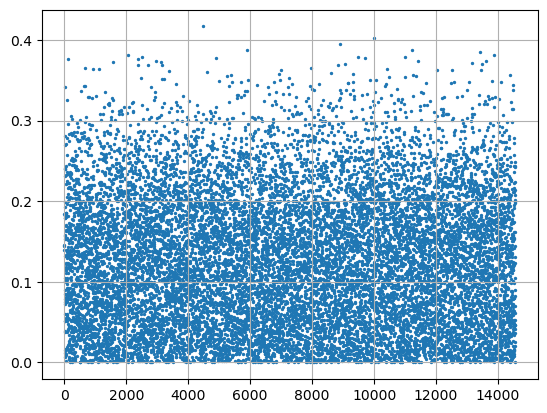

In [121]:
for colname in colsDiff:
    plt.scatter(np.arange(len(differences[colname])), differences[colname], s=2)
plt.grid()
plt.show()

In [ ]:
ptgen = np.array([x for x in pddf["D0GenPT"].tolist()])
ptreco = np.array([np.array(x) for x in pddf["goodMeson_pt"].tolist()])
print(ptgen, len(ptgen))
print(ptreco, len(ptreco))

In [ ]:
plt.scatter(ptgen, (ptreco-ptgen)/ptgen, s=2, color = "#000088")
plt.title("Difference in D0 PT (reco-gen)/gen")
plt.xlabel("D0 PT gen level [GeV]")
plt.ylabel("D0 PT difference (reco-gen)/gen")
plt.grid()
plt.show()
print(np.mean(ptreco-ptgen), np.std(ptreco-ptgen))